# Investigate Fandango Movie Ratings

##  Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article ([link](https://fivethirtyeight.com/features/fandango-movies-ratings/)).

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

Let's analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understand the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Here ready-made data for both these periods of time:

* Walt Hickey made the data he analyzed publicly available on GitHub ([link](https://github.com/fivethirtyeight/data/tree/master/fandango)). Use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on GitHub ([link](https://github.com/mircealex/Movie_ratings_2016_17)) and use it to analyze the rating system's characteristics after Hickey's analysis.

`fandango_score_comparison.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

`movie_ratings_16_17.csv` contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. 

In [1]:
import pandas as pd

# read and explore datasets:
fandango = pd.read_csv("fandango_score_comparison.csv")
ratings = pd.read_csv("movie_ratings_16_17.csv")

fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
fandango.tail()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0


In [3]:
fandango.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [4]:
ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
ratings.tail()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.6,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.2,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.1,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.7,2.40,1.15,1.05,1.5,2.5,1.0,1.0
213,Zootopia,2016,78,8.1,98,92,4.5,3.9,4.05,4.90,4.60,4.0,4.0,5.0,4.5


In [6]:
ratings.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

Isolate the columns that offer information about Fandango's ratings in separate variables so to have just the data for the goal of analysis:

For the data set with ratings previous to Hickey's analysis, select the following columns:
* **'FILM':** the name of the movie
* **'Fandango_Stars':** the number of stars the film had on its Fandango movie page
* **'Fandango_Ratingvalue':** the Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained
* **'Fandango_votes':** the number of user votes the film had on Fandango
* **'Fandango_Difference':** the difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

For the other data set, select the the following columns: 
* **'movie':** the name of the movie
* **'year':** the release year of the movie
* **'fandango':** the Fandango rating of the movie (user score)

In [7]:
columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango_before_16 = fandango[columns].copy()
fandango_before_16.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
columns = ['movie', 'year', 'fandango']
fandango_16_17 = ratings[columns].copy()
fandango_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year. And compare the two states - previous and after Hickey's analysis.

The data sampled at the right moments: one sample was taken previous to the analysis, and the other after the analysis. To describe the population, need to make sure that the samples are representative so results of analysis will not be wrong.

Sampling criteria from Hickey's article and from the README.md of the data set's repository: *The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015)*.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015).

The sampling conditions for our other sample were: *The movie must have been released in 2016 or later. The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data)*.

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. While these samples were good enough for their research, they don't seem too useful for my analysis.

## Change the Goal of Analysis

At this point, there are two alternatives: collect new data or change the goal of our analysis by placing some limitations on it. Tweaking the goal seems a much faster choice compared to collecting new data.

New goals can be: 

* compare average score of fandago site with average scores on other sites. It was higher before Hickey's analysis. Would it be higher after his analysis. It can mean they still make not fair rounding of the scores
* finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016

Let's move on with the second one. So now there should be two populations to describe and compare with each other:

* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

"Popular" meansonly if it has 30 fan ratings or more on Fandango's website.

## Isolate "Popular" Samples

Check if Fandango 2015 have enough movies with count of votes more than 30.

In [9]:
sum(fandango_before_16['Fandango_votes'] < 30)

0

The second file does not have any information about number of votes. So I can check it on the ooriginal site. Check random selected 10 or 15 movies.

In [10]:
fandango_16_17['movie'].sample(10, random_state=1)

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

From the Fandango site:

* **Mechanic: Resurrection** 2,251 Fan Ratings
* **Warcraft** 7,284 Fan Ratings
* **Max Steel** 495 Fan Ratings
* **Me Before You** 5,274 Fan Ratings
* **Fantastic Beasts and Where to Find Them** 13,504 Fan Ratings
* **Cell** 18 Fan Ratings
* **Genius** 127 Fan Ratings
* **Sully** 11,890 Fan Ratings
* **A Hologram for the King** 501 Fan Ratings
* **Captain America: Civil War** 35,185 Fan Ratings

Only 1 movie has number of votes less than 30 (10%). So the dataset can be good enough representation for the goal of this analysis.

Some movies were not released in 2015 and 2016. Isolate only the sample points that belong to our populations of interes: released in 2015 and released in 2016 year into separate datasets.

In the first dataset year is on the parantesis in the column with the name of the movie. Need to separate year to another column.

In [18]:
fandango_before_16['year'] = fandango_before_16['FILM'].str[-5:-1]
fandango_before_16['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [19]:
# isolate movies with 2015 year of release
fandango_15 = fandango_before_16[fandango_before_16['year'] == '2015']
fandango_15['year'].value_counts()

2015    129
Name: year, dtype: int64

In [21]:
# isolate movies with 2016 year of release
fandango_16_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [22]:
fandango_16 = fandango_16_17[fandango_16_17['year'] == 2016]
fandango_16['year'].value_counts()

2016    191
Name: year, dtype: int64

## Compare Distribution Shapes for 2015 and 2016

Once again, the goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. Let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

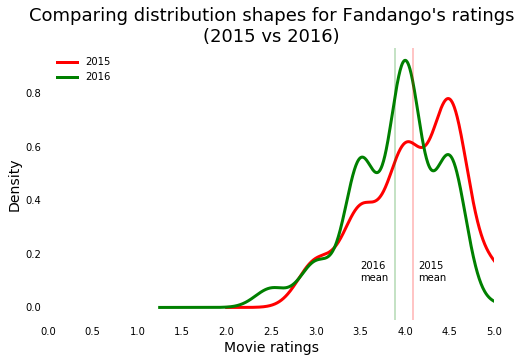

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

# generate two kernel density plots for the distribution of movie ratings of each sample:
fig = plt.figure(figsize=(8, 5))

ax = fandango_15['Fandango_Stars'].plot.kde(color='r', label='2015', linewidth=3, legend=True)

ax = fandango_16['fandango'].plot.kde(color='g', label='2016', linewidth=3, legend=True)

ax.set_title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", fontsize=18)
ax.set_xlabel("Movie ratings", fontsize=14)
ax.set_ylabel("Density", fontsize=14)
ax.set_xlim(0,5)
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.legend(framealpha = 0,loc='upper left')

ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)

ax.tick_params(bottom=False, top=False, left=False, right=False)

ax.axvline(fandango_15['Fandango_Stars'].mean(), c='r', alpha=0.3)
ax.text(4.15, 0.1, '2015\nmean')
ax.axvline(fandango_16['fandango'].mean(), c='g', alpha=0.3)
ax.text(3.5, 0.1, '2016\nmean')

plt.show()

Two aspects on the figure above:

* Both distributions are strongly left skewed.
* The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. The slight left shift of the 2016 distribution shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. The direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Compare Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, need to normalize the tables and show percentages instead.

In [107]:
print('2015:')
fandango_15['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015:


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [106]:
print('2016:')
fandango_16['fandango'].value_counts(normalize=True).sort_index() * 100

2016:


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2015:

* very high ratings (4.5 and 5 stars) is about 45% percents
* perfect rating of 5 stars close to 7%
* a lot of movies with 4.5 ratings - approximately 38%
* the minimum rating is 3 stars

In 2016:

* very high ratings (4.5 and 5 stars) is about 25% percents - 20% lower than in 2015 year
* perfect rating of 5 stars under 1% of the movies - 6% lower than in 2015 year
* 24% of movies with 4.5 ratings - 13% lower than in 2015 year
* the minimum rating is 2.5 stars - 0.5 stars lower than in 2015 year

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 

## Determine the Direction of the Change

Let's take a couple of summary metrics to get a more precise picture about the direction of the change. Compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [115]:
mean_15 = fandango_15['Fandango_Stars'].mean()
mean_16 = fandango_16['fandango'].mean()

median_15 = fandango_15['Fandango_Stars'].median()
median_16 = fandango_16['fandango'].median()

mode_15 = fandango_15['Fandango_Stars'].mode()[0]
mode_16 = fandango_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


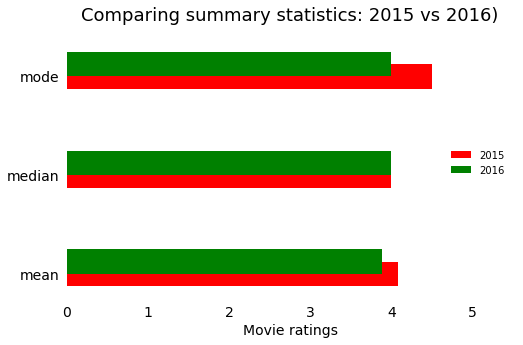

In [136]:
fig = plt.figure(figsize=(8, 5))

ax = summary['2015'].plot.barh(color = 'r', align = 'center', label = '2015', width = .25, fontsize=14)
ax = summary['2016'].plot.barh(color = 'g', align = 'edge', label = '2016', width = .25)

ax.set_title("Comparing summary statistics: 2015 vs 2016)", fontsize=18)
ax.set_xlabel("Movie ratings", fontsize=14)
ax.set_xlim(0,5.5)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.legend(framealpha = 0, loc='center right')

ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)

ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015. While the median is the same for both distributions, the mode is lower in 2016 by 0.5. The direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

Though can't be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.